In [1]:
import jax
import jax.numpy as jnp
from jax import grad, vmap, jit
import jax.random as random
from functools import partial
from typing import Callable, Union
from collections import namedtuple
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
from matplotlib.lines import Line2D
from matplotlib.ticker import FormatStrFormatter
import matplotlib.ticker as ticker
import dill

from kernel import imq_kernel, rbf_kernel
from model import model
from methods import VGD
from experiment import experiment, diagnostic_experiment
from calculate_mmd import calculate_mmd_squared
from plot_functions import plot_predictives

def my_sigmoid(x):
    return 1 / (1 + jnp.exp(-x))

def sigmoid_reg(theta, x):
    return 1 / (1 + jnp.exp(-theta * x))

sig_model = model(0.05, sigmoid_reg, theta_dim=1)

d:\OneDrive - Newcastle University\Project_3_refactor\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## 100 well

In [2]:
# z = b0 + b1*x
b0 = 0  # intercept)
b1 = 10   # slope
sigma = 0.05
prefix = 'sig'

key = random.PRNGKey(40)
rng, rng2 = random.split(key)
n_data = 100

x = random.uniform(rng, (n_data,))*2-1

# observed data with noise
noise = random.normal(rng2, x.shape) * sigma
y_observed = my_sigmoid(b0 + b1 * x) + noise

# y_observed = np.clip(y_observed, 0.01, 0.99)

data_sig_100_w = (x, y_observed)

experiment_sig_100_w = experiment(sig_model, data_sig_100_w, n_particles=20, kernel=imq_kernel, key=random.PRNGKey(42))
experiment_sig_100_w.run(n_steps=5000, step_size=0.01)

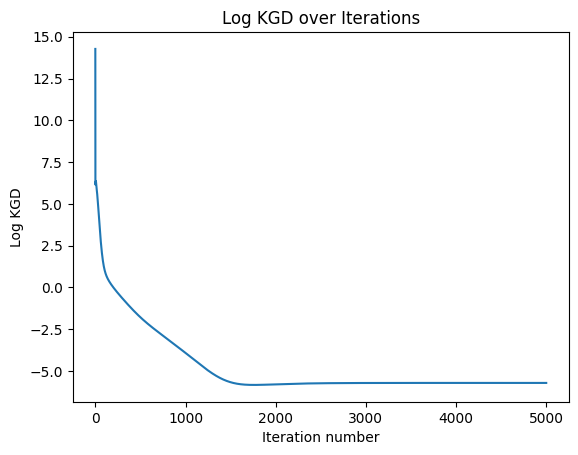

In [3]:
experiment_sig_100_w.plot_KGD()

In [4]:
experiment_sig_100_w.particles_VGD.mean()

Array(8.647606, dtype=float32)

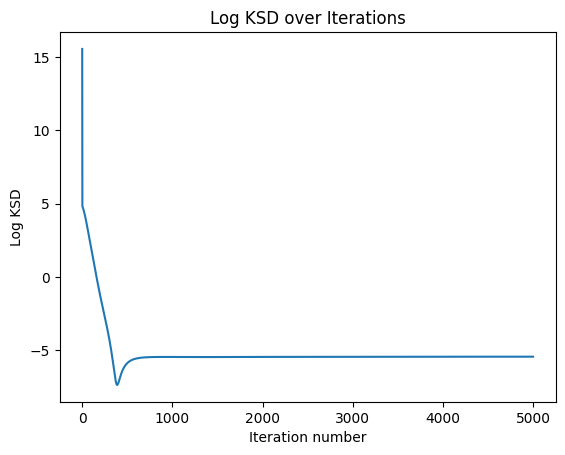

In [5]:
experiment_sig_100_w.plot_KSD()

MMD length scale: 0.43963164
Actual mmd 1.1333695e-05


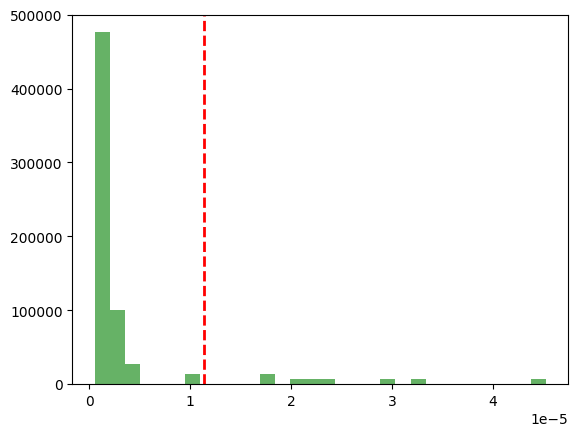

In [6]:
diagnostic_experiment_sig_100_w = diagnostic_experiment(experiment_sig_100_w)
all_mmd_values_sig_100_w, actual_mmd_sig_100_w = diagnostic_experiment_sig_100_w.plot_diagnostic()

## 100 mis

In [7]:
key = random.PRNGKey(42)

# U(-1, 1)
key, x_key = random.split(key)
x = random.uniform(x_key, (n_data,), minval=-1.0, maxval=1.0)

# keys for x < 0 and x > 0
key, y_neg_key, y_pos_key = random.split(key, 3)

# x < 0, Unif(0, 0.5)
y_neg = random.uniform(y_neg_key, (n_data,), minval=0.0, maxval=0.5)

# x > 0, Unif(0.5, 1)
y_pos = random.uniform(y_pos_key, (n_data,), minval=0.5, maxval=1.0)

# if x[i] < 0, y_observed[i] = y_neg[i]
# else y_observed[i] = y_pos[i]
y_observed = jnp.where(x < 0, y_neg, y_pos)


data_sig_100_m = (x, y_observed)

experiment_sig_100_m = experiment(sig_model, data_sig_100_m, n_particles=20, kernel=imq_kernel, key=random.PRNGKey(42))
experiment_sig_100_m.run(n_steps=5000, step_size=0.01)

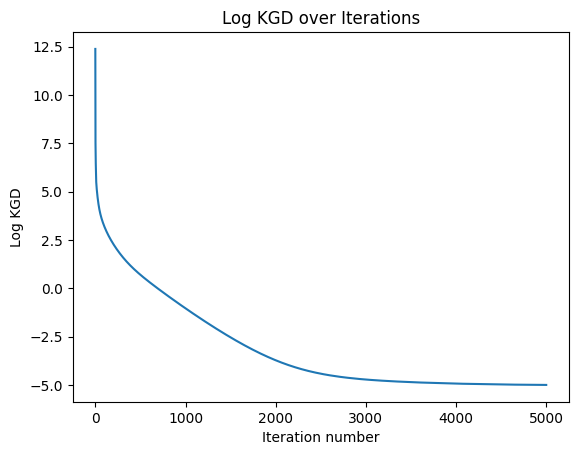

In [8]:
experiment_sig_100_m.plot_KGD()

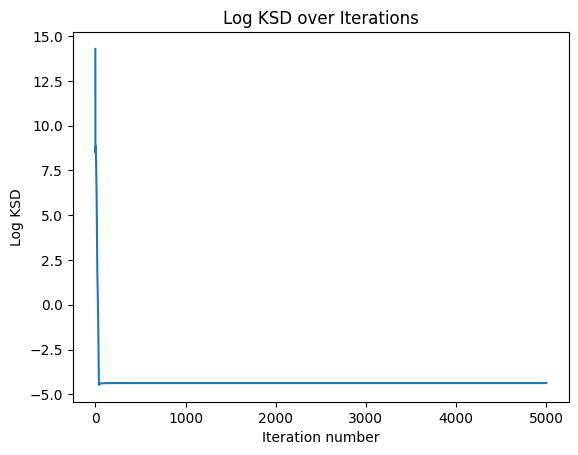

In [9]:
experiment_sig_100_m.plot_KSD()

MMD length scale: 0.27198818
Actual mmd 0.0004709693


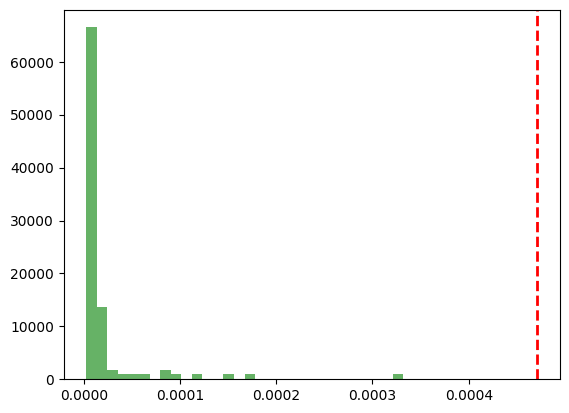

In [10]:
diagnostic_experiment_sig_100_m = diagnostic_experiment(experiment_sig_100_m)
all_mmd_values_sig_100_m, actual_mmd_sig_100_m = diagnostic_experiment_sig_100_m.plot_diagnostic()

## 1000 well

In [11]:
# z = b0 + b1*x
b0 = 0  # intercept)
b1 = 10   # slope
sigma = 0.05
prefix = 'sig'

key = random.PRNGKey(40)
rng, rng2 = random.split(key)
n_data = 1000

x = random.uniform(rng, (n_data,))*2-1

# observed data with noise
noise = random.normal(rng2, x.shape) * sigma
y_observed = my_sigmoid(b0 + b1 * x) + noise

# y_observed = np.clip(y_observed, 0.01, 0.99)

data_sig_1000_w = (x, y_observed)

experiment_sig_1000_w = experiment(sig_model, data_sig_1000_w, n_particles=20, kernel=imq_kernel, key=random.PRNGKey(42))
experiment_sig_1000_w.run(n_steps=10000, step_size=0.001)

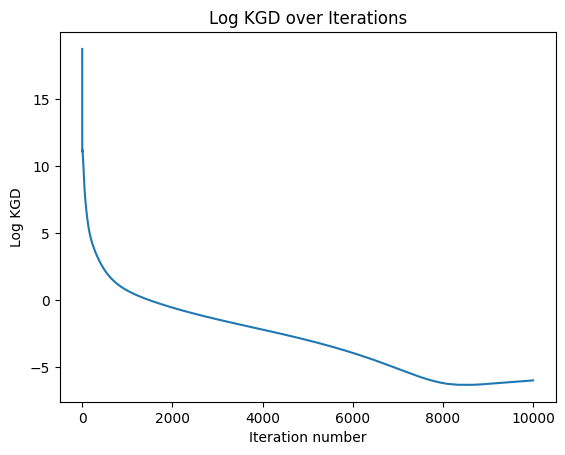

In [12]:
experiment_sig_1000_w.plot_KGD()

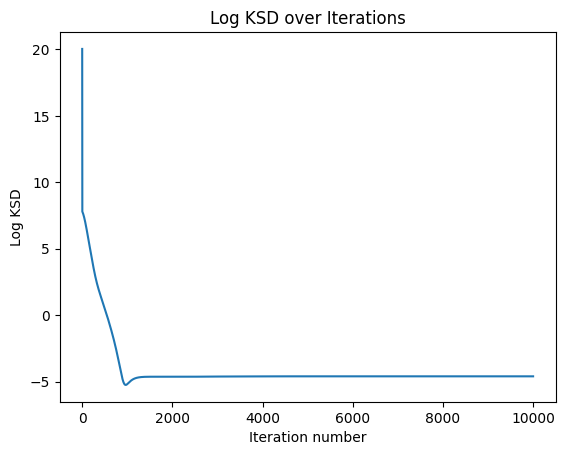

In [13]:
experiment_sig_1000_w.plot_KSD()

MMD length scale: 0.44536954
Actual mmd 3.295612e-07


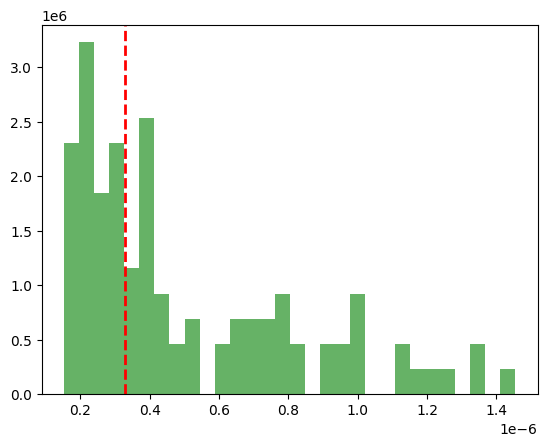

In [14]:
diagnostic_experiment_sig_1000_w = diagnostic_experiment(experiment_sig_1000_w)
all_mmd_values_sig_1000_w, actual_mmd_sig_1000_w = diagnostic_experiment_sig_1000_w.plot_diagnostic()

## 1000 mis

In [15]:
key = random.PRNGKey(42)
n_data = 1000

# U(-1, 1)
key, x_key = random.split(key)
x = random.uniform(x_key, (n_data,), minval=-1.0, maxval=1.0)

# keys for x < 0 and x > 0
key, y_neg_key, y_pos_key = random.split(key, 3)

# x < 0, Unif(0, 0.5)
y_neg = random.uniform(y_neg_key, (n_data,), minval=0.0, maxval=0.5)

# x > 0, Unif(0.5, 1)
y_pos = random.uniform(y_pos_key, (n_data,), minval=0.5, maxval=1.0)

# if x[i] < 0, y_observed[i] = y_neg[i]
# else y_observed[i] = y_pos[i]
y_observed = jnp.where(x < 0, y_neg, y_pos)


data_sig_1000_m = (x, y_observed)

experiment_sig_1000_m = experiment(sig_model, data_sig_1000_m, n_particles=20, kernel=imq_kernel, key=random.PRNGKey(42))
experiment_sig_1000_m.run(n_steps=40000, step_size=0.0005)

In [16]:
jnp.mean(experiment_sig_1000_m.particles_SVGD)

Array(1.9307784, dtype=float32)

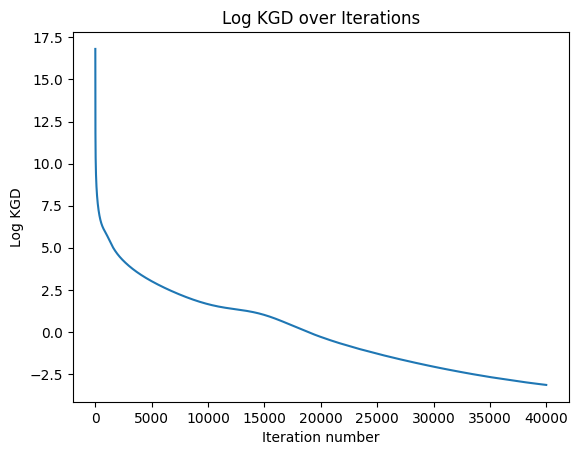

In [17]:
experiment_sig_1000_m.plot_KGD()

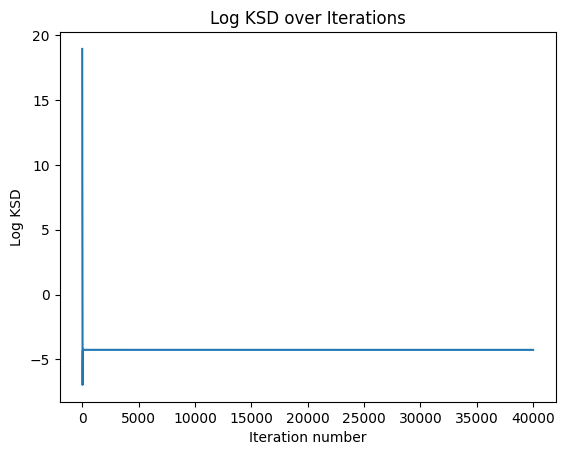

In [18]:
experiment_sig_1000_m.plot_KSD()

MMD length scale: 0.27392712
Actual mmd 0.0006039203


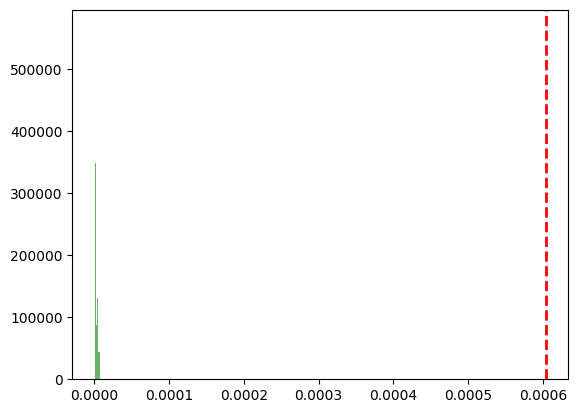

In [19]:
experiment_sig_1000_m.n_steps=4000
experiment_sig_1000_m.step_size=0.0005
diagnostic_experiment_sig_1000_m = diagnostic_experiment(experiment_sig_1000_m)
all_mmd_values_sig_1000_m, actual_mmd_sig_1000_m = diagnostic_experiment_sig_1000_m.plot_diagnostic()

In [20]:
diagnostic_experiment_sig_1000_m.mmd_length_scale

Array(0.27392712, dtype=float32)

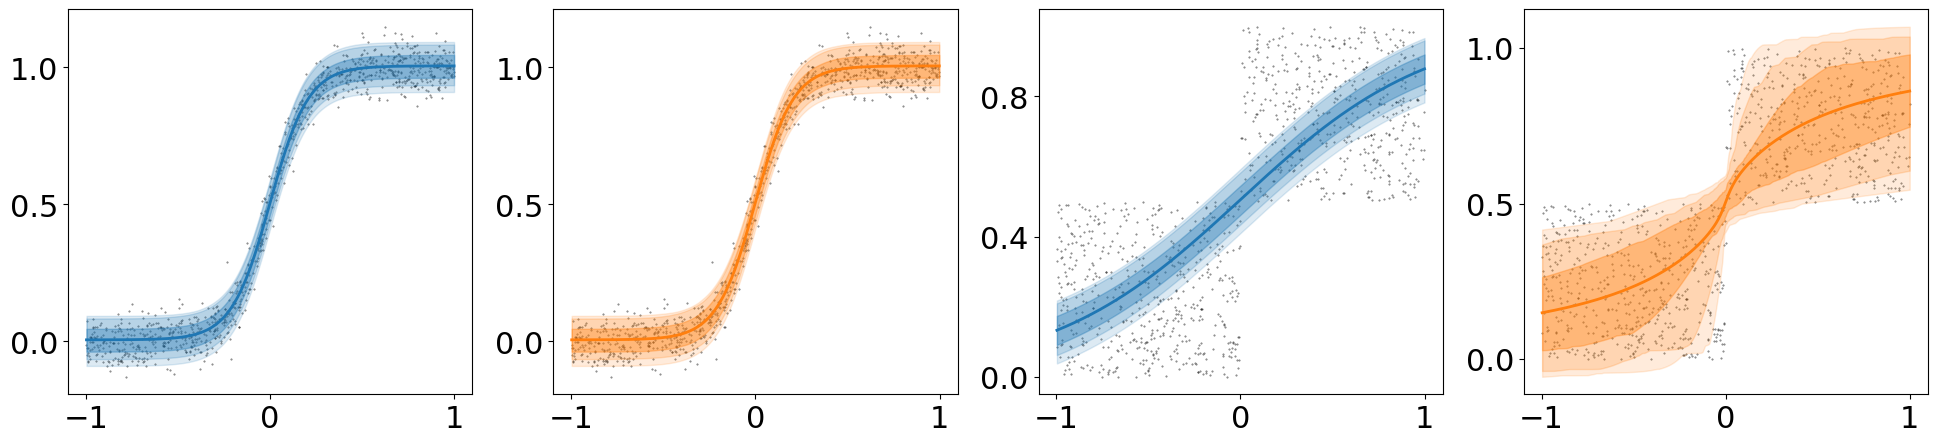

In [22]:
plot_predictives(
    experiment_sig_1000_w,
    experiment_sig_1000_m,
    intervals=[50, 80, 90]
)

## 10000 well

In [23]:
# z = b0 + b1*x
b0 = 0  # intercept)
b1 = 10   # slope
sigma = 0.05
n_data = 10000

data_sig_10000_w = sig_model.generate_data(n_data, b1, key=random.PRNGKey(0))

experiment_sig_10000_w = experiment(sig_model, data_sig_10000_w, n_particles=20, kernel=imq_kernel, key=random.PRNGKey(49))
experiment_sig_10000_w.run(n_steps=20000, step_size=0.0005)

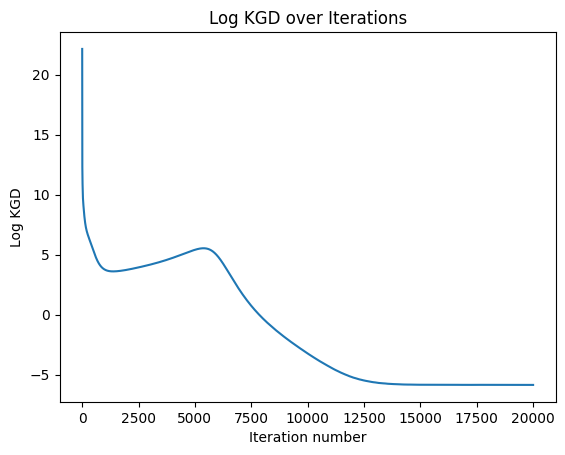

In [24]:
experiment_sig_10000_w.plot_KGD()

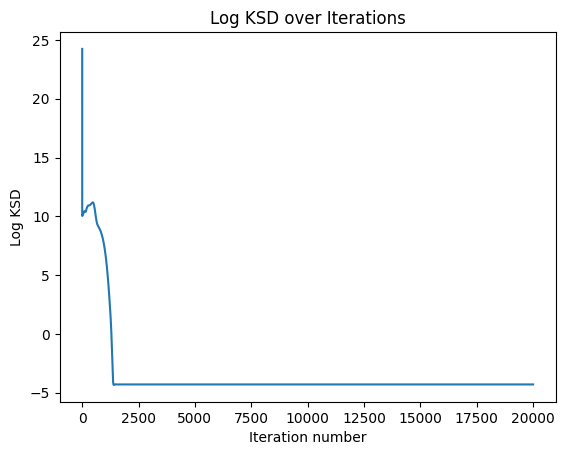

In [25]:
experiment_sig_10000_w.plot_KSD()

In [26]:
experiment_sig_10000_w.particles_SVGD.mean()

Array(9.98558, dtype=float32)

MMD length scale: 0.44715157
Actual mmd 2.9380155e-07


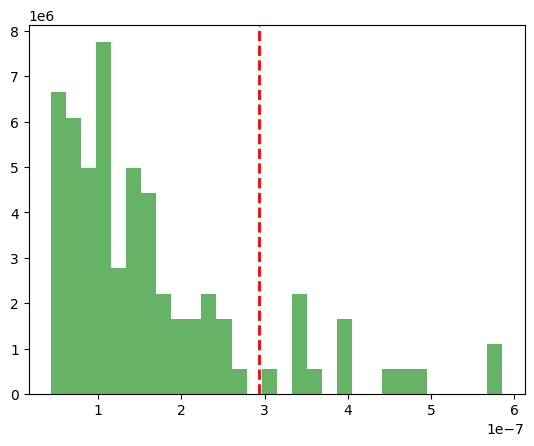

In [27]:
diagnostic_experiment_sig_10000_w = diagnostic_experiment(experiment_sig_10000_w)
all_mmd_values_sig_10000_w, actual_mmd_sig_10000_w = diagnostic_experiment_sig_10000_w.plot_diagnostic()

In [ ]:
num_plots = len(diagnostic_experiment_sig_10000_w.all_history_KGD)
cols = 10
rows = (num_plots + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(cols * 2, rows * 2), sharex=True, sharey=True)
axes = axes.flatten()

for i, history in enumerate(diagnostic_experiment_sig_10000_w.all_history_KGD):
    ax = axes[i]
    ax.plot(range(15000), jnp.log(history))
    ax.set_title(f'History {i+1}', fontsize=8)
    ax.tick_params(axis='both', which='major', labelsize=6)
    ax.grid(True, linestyle='--', alpha=0.6)

for j in range(num_plots, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle('Individual Histories (Subplots)', y=1.02, fontsize=16)
plt.savefig('individual_KGD_subplots_10000w.png', dpi=300) # 可以设置更高的 DPI 获得更清晰的图像
plt.close()

In [ ]:
num_plots = len(diagnostic_experiment_sig_10000_w.all_history_KSD)
cols = 10
rows = (num_plots + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(cols * 2, rows * 2), sharex=True, sharey=True)
axes = axes.flatten()

for i, history in enumerate(diagnostic_experiment_sig_10000_w.all_history_KSD):
    ax = axes[i]
    ax.plot(range(15000), jnp.log(history))
    ax.set_title(f'History {i+1}', fontsize=8)
    ax.tick_params(axis='both', which='major', labelsize=6)
    ax.grid(True, linestyle='--', alpha=0.6)

for j in range(num_plots, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle('Individual Histories (Subplots)', y=1.02, fontsize=16)
plt.savefig('individual_KSD_subplots_10000w.png', dpi=300) # 可以设置更高的 DPI 获得更清晰的图像
plt.close()

## 10000 mis

In [28]:
key = random.PRNGKey(42)
n_data = 10000

# U(-1, 1)
key, x_key = random.split(key)
x = random.uniform(x_key, (n_data,), minval=-1.0, maxval=1.0)

# keys for x < 0 and x > 0
key, y_neg_key, y_pos_key = random.split(key, 3)

# x < 0, Unif(0, 0.5)
y_neg = random.uniform(y_neg_key, (n_data,), minval=0.0, maxval=0.5)

# x > 0, Unif(0.5, 1)
y_pos = random.uniform(y_pos_key, (n_data,), minval=0.5, maxval=1.0)

# if x[i] < 0, y_observed[i] = y_neg[i]
# else y_observed[i] = y_pos[i]
y_observed = jnp.where(x < 0, y_neg, y_pos)


data_sig_10000_m = (x, y_observed)

experiment_sig_10000_m = experiment(sig_model, data_sig_10000_m, n_particles=20, kernel=imq_kernel, key=random.PRNGKey(42))
experiment_sig_10000_m.run(n_steps=80000, step_size=0.00005)

In [29]:
jnp.mean(experiment_sig_10000_m.particles_SVGD)

Array(1.8622509, dtype=float32)

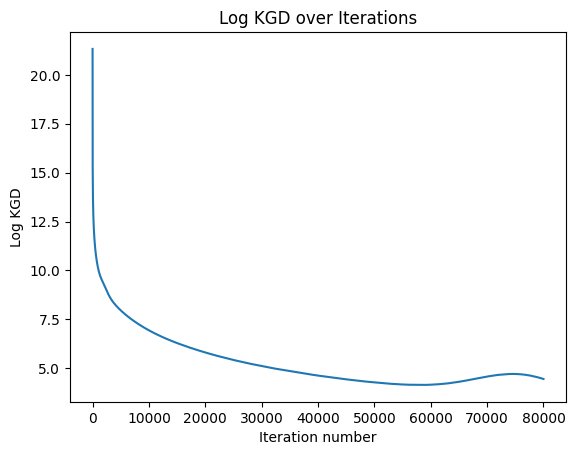

In [30]:
experiment_sig_10000_m.plot_KGD()

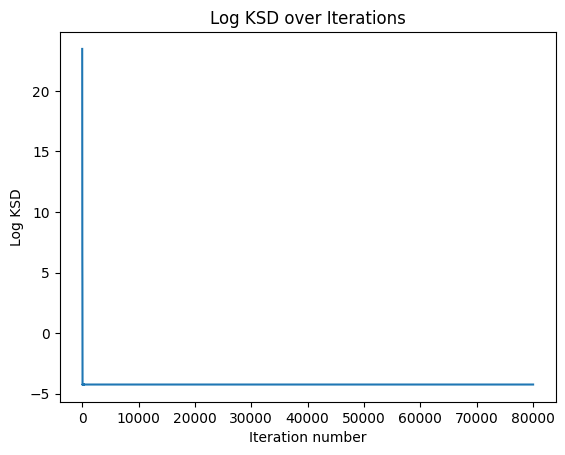

In [31]:
experiment_sig_10000_m.plot_KSD()

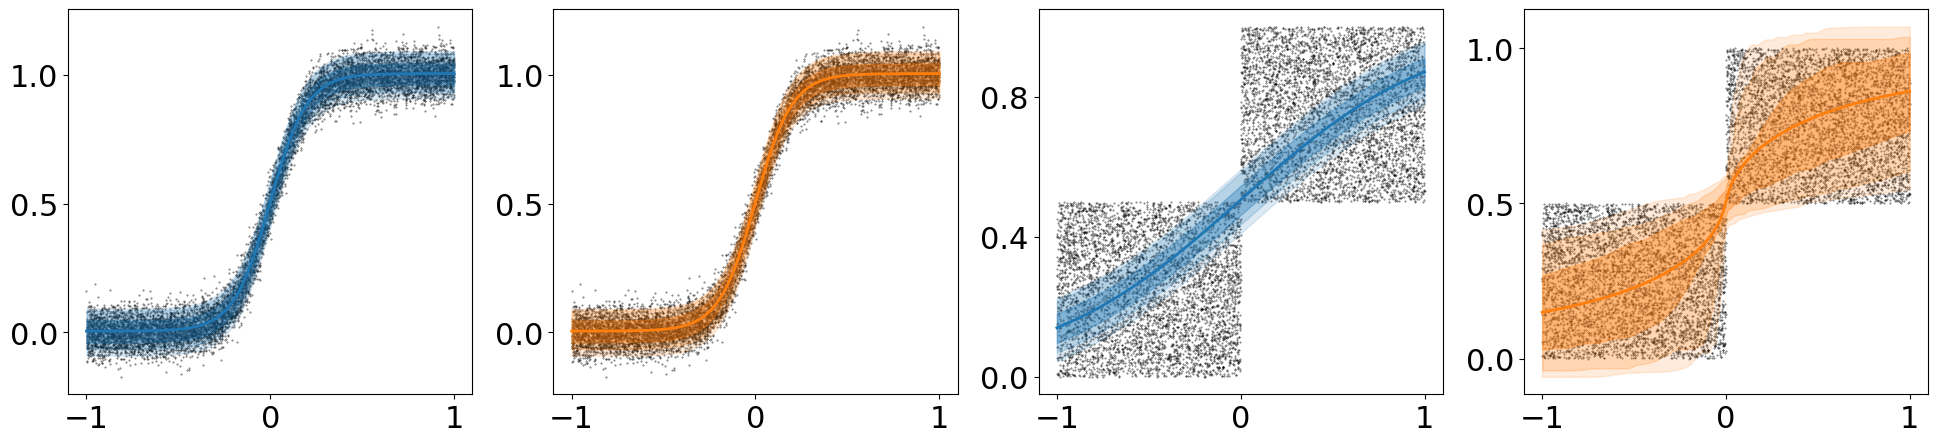

In [32]:
plot_predictives(
    experiment_sig_10000_w,
    experiment_sig_10000_m,
    intervals=[50, 80, 90]
)

MMD length scale: 0.27387586
Actual mmd 0.0006788466


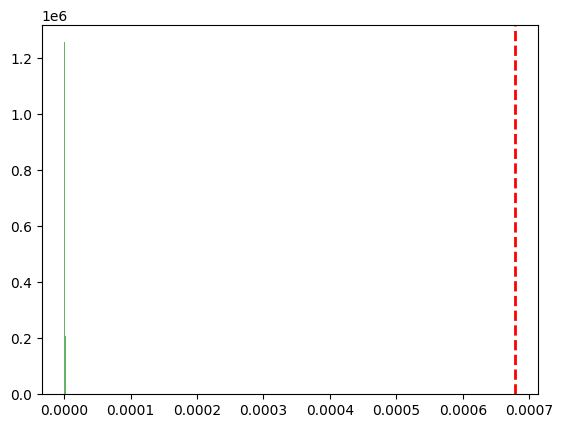

In [33]:
diagnostic_experiment_sig_10000_m = diagnostic_experiment(experiment_sig_10000_m)
all_mmd_values_sig_10000_m, actual_mmd_sig_10000_m = diagnostic_experiment_sig_10000_m.plot_diagnostic()

(array([33., 29., 13., 10., 10.,  1.,  2.,  1.,  0.,  1.]),
 array([1.87927469e-07, 4.79642495e-07, 7.71357520e-07, 1.06307255e-06,
        1.35478763e-06, 1.64650260e-06, 1.93821757e-06, 2.22993276e-06,
        2.52164773e-06, 2.81336270e-06, 3.10507789e-06]),
 <BarContainer object of 10 artists>)

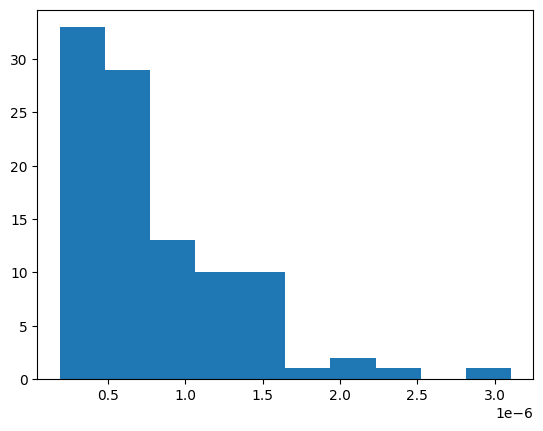

In [ ]:
plt.hist(all_mmd_values_sig_10000_m)

In [34]:
import dill 

data_to_save = {
    'experiment_sig_100_w': experiment_sig_100_w,
    'all_mmd_values_sig_100_w': all_mmd_values_sig_100_w,
    'actual_mmd_sig_100_w': actual_mmd_sig_100_w,
    'experiment_sig_100_m': experiment_sig_100_m,
    'all_mmd_values_sig_100_m': all_mmd_values_sig_100_m,
    'actual_mmd_sig_100_m': actual_mmd_sig_100_m,

    'experiment_sig_1000_w': experiment_sig_1000_w,
    'all_mmd_values_sig_1000_w': all_mmd_values_sig_1000_w,
    'actual_mmd_sig_1000_w': actual_mmd_sig_1000_w,
    'experiment_sig_1000_m': experiment_sig_1000_m,
    'all_mmd_values_sig_1000_m': all_mmd_values_sig_1000_m,
    'actual_mmd_sig_1000_m': actual_mmd_sig_1000_m,

    'experiment_sig_10000_w': experiment_sig_10000_w,
    'all_mmd_values_sig_10000_w': all_mmd_values_sig_10000_w,
    'actual_mmd_sig_10000_w': actual_mmd_sig_10000_w,
    'experiment_sig_10000_m': experiment_sig_10000_m,
    'all_mmd_values_sig_10000_m': all_mmd_values_sig_10000_m,
    'actual_mmd_sig_10000_m': actual_mmd_sig_10000_m
}
print("正在使用 dill.dump() 保存对象...")
with open('different_data_size.dill', 'wb') as f:
    dill.dump(data_to_save, f)

print("保存成功！")

正在使用 dill.dump() 保存对象...
保存成功！


## plot

In [2]:
import dill
from plot_functions import predictive_posterior_distribution_k, plot_shaded_region_predictive, plot_diagnostic, plot_diagnostic_manual_broken

def plot_main_figure(file_name='main_fig.dill'):
    sns.set_theme(
    style="white",
    rc={
        "font.family": "serif",
        "font.serif": ["Computer Modern Roman", "CMU Serif", "Times New Roman"],
        "mathtext.fontset": "cm",
        "legend.frameon": True
    }
    )
    # -----------------------------------------------------------

    jax.config.update("jax_enable_x64", True)
    try:
        with open(file_name, 'rb') as f:
            data = dill.load(f)
        print(f"成功加载文件，包含 {len(data.keys())} 个数组: {list(data.keys())}")
    except FileNotFoundError:
        print(fr"错误：'{file_name}' 文件未找到。")
        exit()

    # --- 3. 自动化绘图 ---
    col_widths = [1, 1, 1, 1, 1, 0.75 + 0.25] 
    row_heights = [1, 1, 1]
    nested_col_widths = [0.75, 0.25]

    # --- 创建图像 ---
    fig = plt.figure(figsize=(24, 12.5))
    main_gs = fig.add_gridspec(
        nrows=3, 
        ncols=6, 
        height_ratios=row_heights,
        width_ratios=col_widths
    )
    axes = np.empty((3, 7), dtype=object)
    for r in range(3):
        # --- a. 正常添加前 5 列 (索引 0-4) ---
        for c in range(5):
            axes[r, c] = fig.add_subplot(main_gs[r, c])
            
        # --- b. 添加第 6 列 (索引 5) 作为容器 ---
        # 获取主网格的第 (r, 5) 个单元格
        sub_gs_spec = main_gs[r, 5]
        
        # 在该单元格内创建一个 1x2 的嵌套子网格
        # 【【【 这就是您要的控制！wspace=0.05 】】】
        nested_gs = sub_gs_spec.subgridspec(
            1, 2, 
            width_ratios=nested_col_widths, 
            wspace=0.05 # <--- 在此独立控制最后两列的间距
        )
        
        # --- c. 在子网格中添加最后两列 (索引 5 和 6) ---
        axes[r, 5] = fig.add_subplot(nested_gs[0, 0])
        axes[r, 6] = fig.add_subplot(nested_gs[0, 1])

        
    data_prefixes = ['sig_100', 'sig_1000', 'sig_10000']
    # row_titles = ['Quadratic', 'Sigmoid', '2D Quadratic']
    row_titles = [r'$\mathrm{n=100}$', r'$\mathrm{n=1000}$', r'$\mathrm{n=10000}$']
    VGD_color = '#ff7f0e'
    SVGD_color = '#1f77b4'

    for row_idx, prefix in enumerate(data_prefixes):
        experiment_w = data[f'experiment_{prefix}_w']
        all_mmd_values_w = data[f'all_mmd_values_{prefix}_w']
        actual_mmd_w = data[f'actual_mmd_{prefix}_w'].item()

        plot_shaded_region_predictive(axes[row_idx, 0], experiment_w, experiment_w.particles_SVGD, SVGD_color)
        plot_shaded_region_predictive(axes[row_idx, 1], experiment_w, experiment_w.particles_VGD, VGD_color)
        axes[row_idx, 1].yaxis.set_ticks_position('none')
        plt.setp(axes[row_idx, 1].get_yticklabels(), visible=False)

        ax = axes[row_idx, 2]
        plot_diagnostic(ax, all_mmd_values=all_mmd_values_w, actual_mmd=actual_mmd_w)

        experiment_m = data[f'experiment_{prefix}_m']
        all_mmd_values_m = data[f'all_mmd_values_{prefix}_m']
        actual_mmd_m = data[f'actual_mmd_{prefix}_m'].item()

        plot_shaded_region_predictive(axes[row_idx, 3], experiment_m, experiment_m.particles_SVGD, SVGD_color)
        plot_shaded_region_predictive(axes[row_idx, 4], experiment_m, experiment_m.particles_VGD, VGD_color)
        axes[row_idx, 4].yaxis.set_ticks_position('none')
        plt.setp(axes[row_idx, 4].get_yticklabels(), visible=False)

        ax_left = axes[row_idx, 5]
        ax_right = axes[row_idx, 6]
        ax_right.sharey(ax_left)
        plot_diagnostic_manual_broken(
            ax_left, 
            ax_right, 
            all_mmd_values=all_mmd_values_m, 
            actual_mmd=actual_mmd_m,
            width_ratios=[0.9, 0.3] 
        )

    # --- 4. 调整布局 ---
    plt.tight_layout(rect=[0.03, 0, 1, 0.94])

    # --- 5. 添加全局标题和标签 ---
    col_titles = [r'$P_\mathrm{Bayes}$', r'$P_\mathrm{PrO}$', r'$\mathrm{MMD}$', r'$P_\mathrm{Bayes}$', r'$P_\mathrm{PrO}$', r'$\mathrm{MMD}$']
    for i, title in enumerate(col_titles):
        if title:
            if i == 5: # (索引为5的标题)
                # (特殊处理：跨越第 5 和 第 6 列)
                x0 = axes[0, 5].get_position().x0
                x1 = axes[0, 6].get_position().x1
                x_coord = (x0 + x1) / 2
            else:
                x_coord = (axes[0, i].get_position().x0 + axes[0, i].get_position().x1) / 2
            
            fig.text(x_coord, 0.96, title, ha='center', va='top', fontsize=28)

    for i, title in enumerate(row_titles):
        y_coord = (axes[i, 0].get_position().y0 + axes[i, 0].get_position().y1) / 2
        fig.text(0.02, y_coord, title, ha='left', va='center', fontsize=28, rotation=90)


    # --- 6. 显示图像 ---
    fig.subplots_adjust(
        wspace=0.16,   # 水平间距
        hspace=0.12    # 垂直间距
    )
    plt.show()

成功加载文件，包含 18 个数组: ['experiment_sig_100_w', 'all_mmd_values_sig_100_w', 'actual_mmd_sig_100_w', 'experiment_sig_100_m', 'all_mmd_values_sig_100_m', 'actual_mmd_sig_100_m', 'experiment_sig_1000_w', 'all_mmd_values_sig_1000_w', 'actual_mmd_sig_1000_w', 'experiment_sig_1000_m', 'all_mmd_values_sig_1000_m', 'actual_mmd_sig_1000_m', 'experiment_sig_10000_w', 'all_mmd_values_sig_10000_w', 'actual_mmd_sig_10000_w', 'experiment_sig_10000_m', 'all_mmd_values_sig_10000_m', 'actual_mmd_sig_10000_m']
Actual mmd 1.1333694601489697e-05
Actual mmd 0.00047096930211409926
Actual mmd 3.2956120321614435e-07
Actual mmd 0.0006039203144609928
Actual mmd 2.938015484232892e-07
Actual mmd 0.00067884661257267


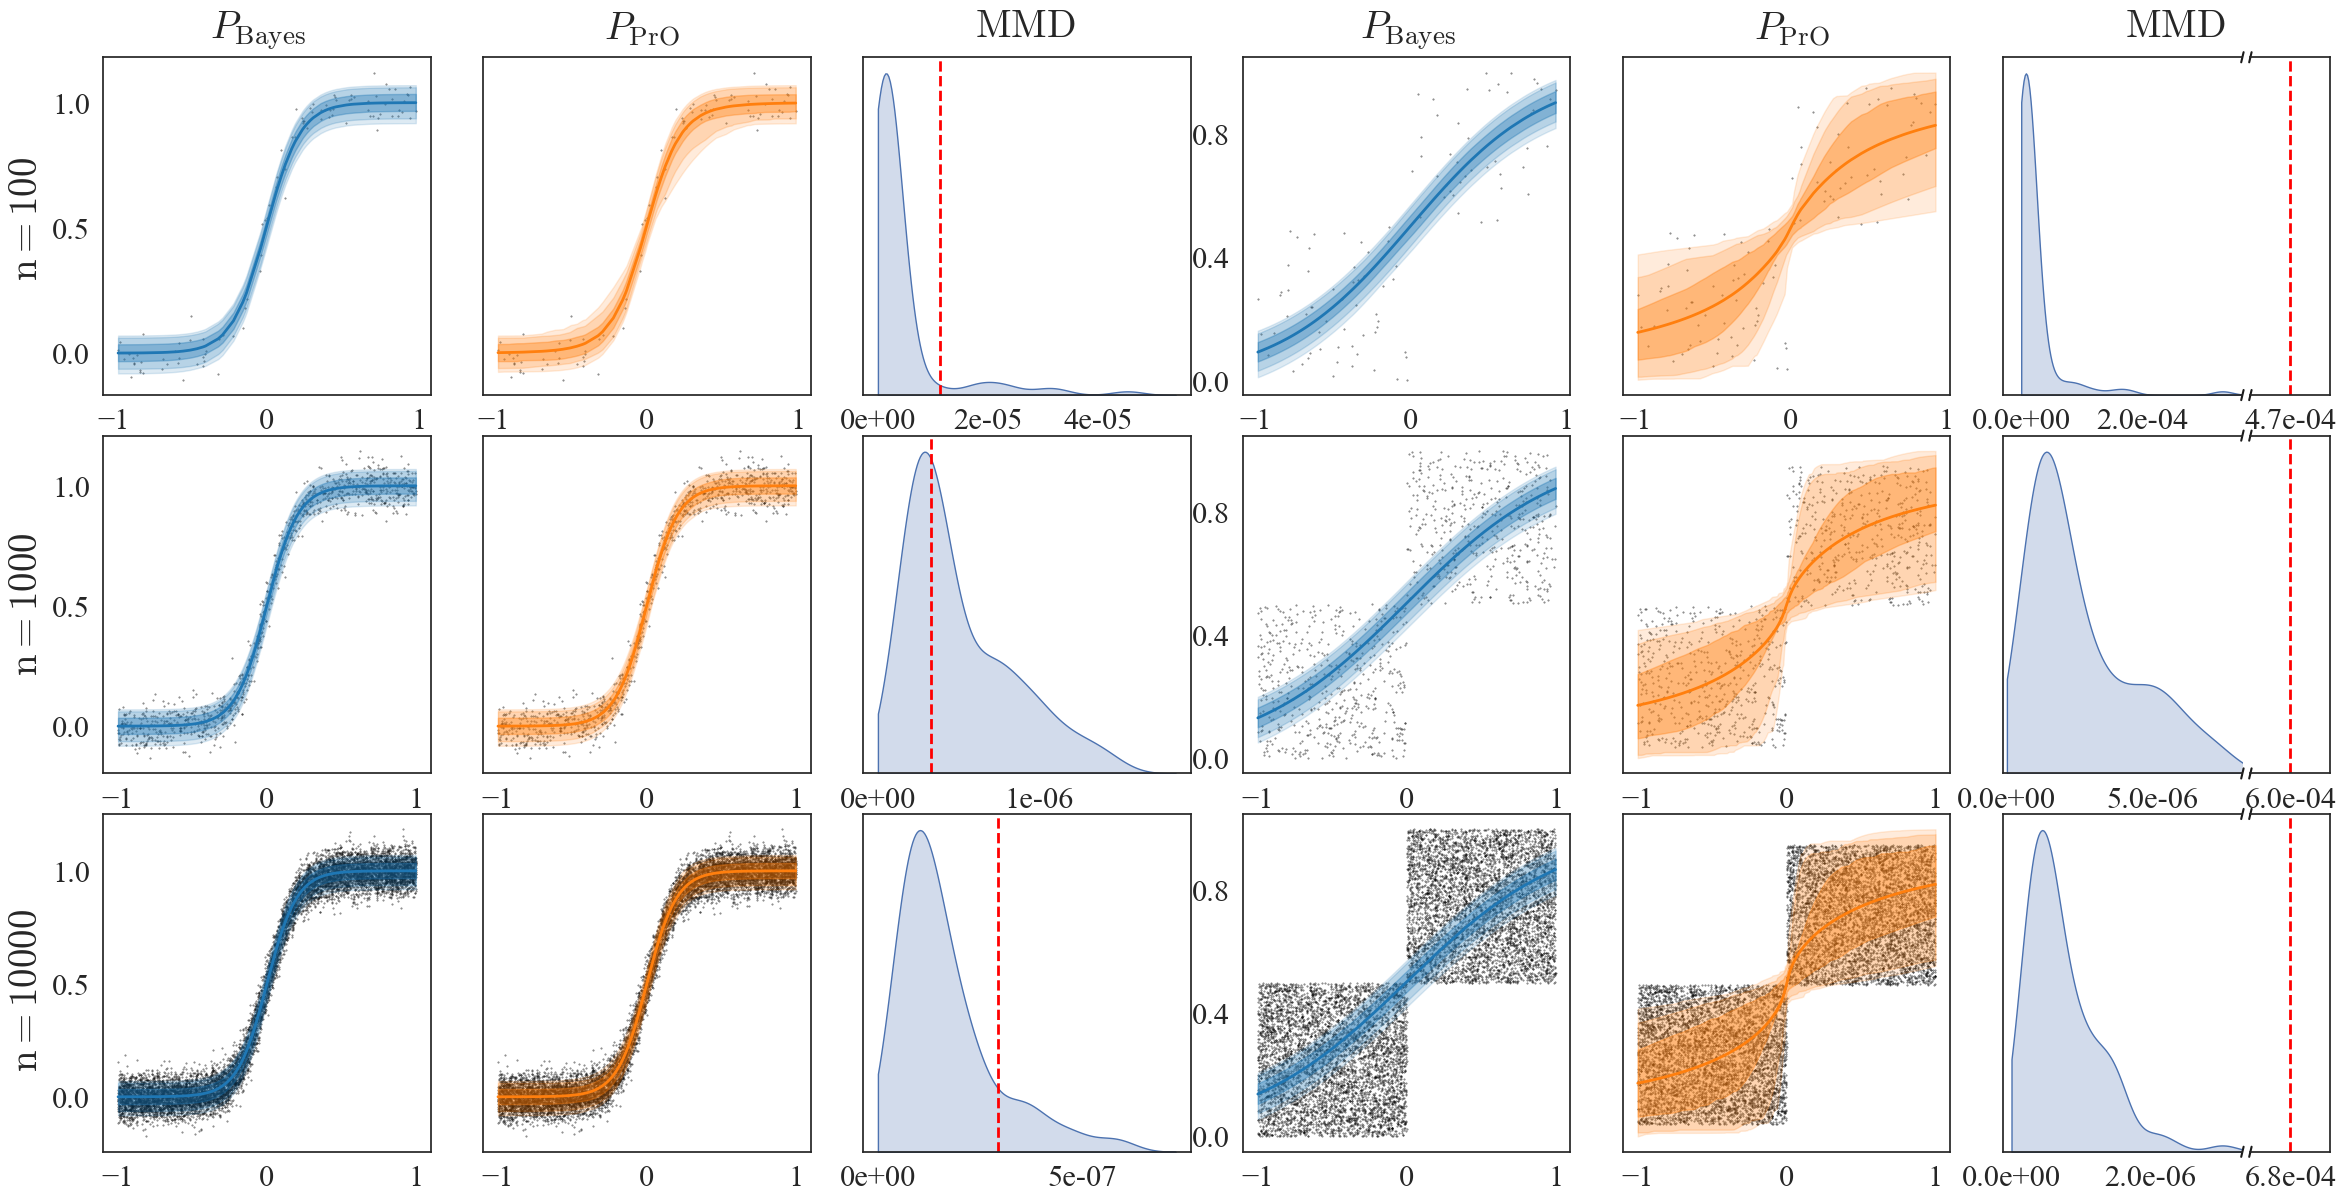

In [3]:
plot_main_figure('different_data_size.dill')